In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob

In [2]:
import ee
import geemap
service_account = ' boba-account@boba-430314.iam.gserviceaccount.com '
credentials = ee.ServiceAccountCredentials(service_account,'C:/Users/arj26323/OneDrive - University of Georgia/Documents/GEE AUTH/boba-430314-a19be859bfca.json')

ee.Initialize(credentials)

print(geemap.__version__)

0.34.1


In [3]:
#ADD: PDSI and Evaporation potential!

In [4]:
##Remote sensing data:

# df_rs = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_remotedata.csv')
##Above: needs to be merged with biomass data (df_sum)
# df1 = pd.merge(df_rs, df_sum, how = 'right')

dfv = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_yr.csv')
dfw = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_octnov.csv')
dfx = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_augoct.csv')
dfy = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_sepoct.csv')
dfz = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_oct.csv')

dfv.rename(
    columns={
        'ndvi':'ndvi_yr','savi':'savi_yr','wdrvi5':'wdrvi5_yr','nd_r_g':'nd_r_g_yr', 'nd_g_b':'nd_g_b_yr',
        'nd_swir2_nir':'nd_swir2_nir_yr', 'nd_swir2_r':'nd_swir2_r_yr'
    }, inplace=True
)

dfw.rename(
    columns={
        'ndvi':'ndvi_octnov','savi':'savi_octnov','wdrvi5':'wdrvi5_octnov','nd_r_g':'nd_r_g_octnov', 'nd_g_b':'nd_g_b_octnov',
        'nd_swir2_nir':'nd_swir2_nir_octnov', 'nd_swir2_r':'nd_swir2_r_octnov'
    }, inplace=True
)

dfx.rename(
    columns={
        'ndvi':'ndvi_augoct','savi':'savi_augoct','wdrvi5':'wdrvi5_augoct','nd_r_g':'nd_r_g_augoct', 'nd_g_b':'nd_g_b_augoct',
        'nd_swir2_nir':'nd_swir2_nir_augoct', 'nd_swir2_r':'nd_swir2_r_augoct'
    }, inplace=True
)

dfy.rename(
    columns={
        'ndvi':'ndvi_sepoct','savi':'savi_sepoct','wdrvi5':'wdrvi5_sepoct','nd_r_g':'nd_r_g_sepoct', 'nd_g_b':'nd_g_b_sepoct',
        'nd_swir2_nir':'nd_swir2_nir_sepoct', 'nd_swir2_r':'nd_swir2_r_sepoct'
    }, inplace=True
)

df9 = pd.merge(dfw, dfv, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

df8 = pd.merge(dfx, dfy, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

df0 = pd.merge(df9, df8, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')              
               
df1 = pd.merge(df0, dfz, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

# df0 = pd.merge(dfx, dfy, on = ['Latitude', 'Longitude', 'Plant_Biomass', 'Year'], how = 'left')
# df1 = pd.merge(dfz, df0, on = ['Latitude', 'Longitude', 'Plant_Biomass', 'Year'], how = 'left')

df1['ident'] = df1['ndvi'] * df1['ndvi_augoct'] * df1['ndvi_sepoct']

display(df1)

# for col in df1.columns:
#     print(col)

,Site,Species_Code,Year,Zone,Plot,Latitude,Plant_Biomass,Sample_Size,Longitude,Date,...,nd_swir2_nir_sepoct,nd_swir2_r_sepoct,ndvi,savi,wdrvi5,nd_r_g,nd_g_b,nd_swir2_nir,nd_swir2_r,ident
0,1,A1,2000,1,1,31.538627,516.324,23,-81.422539,10/11/2000,...,-0.255463,0.050628,0.302182,0.087219,-0.034640,-0.003197,0.074486,-0.255463,0.050628,0.031457
1,3,A1,2000,1,1,31.518920,710.396,20,-81.228956,10/18/2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,A1,2000,1,1,31.451676,1534.304,25,-81.365498,10/10/2000,...,-0.399095,-0.118194,0.294807,0.085244,-0.042724,0.034398,0.110169,-0.399095,-0.118194,0.025622
3,5,A1,2000,1,1,31.436090,2022.264,25,-81.339919,10/10/2000,...,-0.428496,0.027896,0.451001,0.184322,0.138487,-0.061616,0.216527,-0.428496,0.027896,0.091632
4,6,A1,2000,1,1,31.388423,1032.632,20,-81.279792,10/12/2000,...,-0.515328,-0.230591,0.323136,0.115771,-0.011429,0.000000,0.135829,-0.515328,-0.230591,0.027201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,7,A4,2019,2,8,31.334597,2365.620,14,-81.478039,10/8/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2908,7,A4,2019,1,12,31.335017,1821.010,12,-81.478711,10/8/2019,...,-0.650901,-0.090909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2909,7,A4,2019,1,13,31.334934,2482.584,14,-81.478709,10/8/2019,...,-0.618781,-0.171994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2910,7,A4,2019,1,16,31.334682,2511.936,17,-81.478564,10/8/2019,...,-0.618781,-0.171994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

# df1 = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/df_test_NOV2024.csv') ##Changed to single df - 2024
df1 = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/df_testxyzgridmet.csv')

# df1
# for col in df1.columns:
#     print(col)

In [6]:
import glob

path = r'C:/Users/arj26323/Documents/Xin data/Landsat' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)


df_flooding = df.groupby(['Latitude', 'Longitude', 'Year']).apply(
    lambda g: (g['flats'] >= 0.2).mean()).reset_index(name='Percent_flooding'
                                                     )

# df1 = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/df_testxyzgridmet.csv')

# df1 = df1.merge(df_flooding, on=['Latitude', 'Longitude', 'Year'], how='inner')
# df1

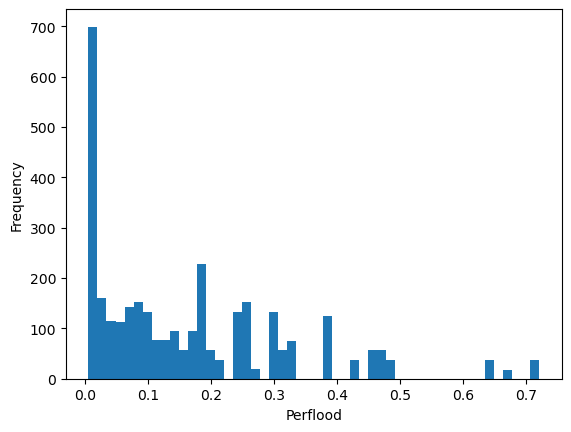

In [7]:
df_flooding

import matplotlib.pyplot as plt
plt.hist(df_flooding['Percent_flooding'], bins=50)
plt.xlabel("Perflood")
plt.ylabel("Frequency")
plt.show()

In [8]:
##Modeling

# df1 = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/ga_testx.csv') #NO TIDAL FILTERING IN EXTRACTION

df1 = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/df_testxyzgridmet.csv')

df1 = df1.merge(df_flooding, on=['Latitude', 'Longitude', 'Year'], how='inner') ##BE VERY CAREFUL

df1.rename(columns={'elevation':'Elevation'}, inplace=True)

# df1 = df1[df1['ident'].notna()] ##remove rows with NaN for columns used in the model 


# df1 = df1[df1['prcp'].notna()] ##CAREFUL; added 7/11/22


# df1 = df1[df1['Species_Code'] == 'A1'] ##careful here


# df1 = df1[(df1['flats'] < 0.1)] ##TIDAL FILTERING STEP!

#Adding evi
df1['evi'] = ((df1['NIR_band']-df1['Red_band'])*2.5)/(df1['NIR_band']+6*df1['Red_band']+7.5*df1['Blue_band']+1)
df1['evi_peak'] = ((df1['NIR_band_peak']-df1['Red_band_peak'])*2.5)/(df1['NIR_band_peak']+6*df1['Red_band_peak']+7.5*df1['Blue_band_peak']+1)
df1['evi_MarMay'] = ((df1['NIR_band_MarMay']-df1['Red_band_MarMay'])*2.5)/(df1['NIR_band_MarMay']+6*df1['Red_band_MarMay']+7.5*df1['Blue_band_MarMay']+1)
df1['evi_year'] = ((df1['NIR_band_year']-df1['Red_band_year'])*2.5)/(df1['NIR_band_year']+6*df1['Red_band_year']+7.5*df1['Blue_band_year']+1)

from sklearn.model_selection import train_test_split
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime

df1['Date'] = pd.to_datetime(df1.Date, format='%m/%d/%Y')
df1['DOY'] = df1['Date'].dt.strftime('%j') ##Add day of year (DOY) to dataset
# df1['DOY'] = df1['Date'].dt.strftime('%j').astype('float') ##The astype('float') is only for the regression - not for ML 


df1['ndvi_prcp_interaction'] = df1['ndvi'] * df1['prcp_daymMarMay']



xargs=df1[
    [
        'Elevation', 
        'nd_swir2_nir_peak',
        'nd_swir2_nir', 
        'Percent_flooding',
        'dayl_Max', 
        'dayl_Min',
        'srad_peak', 
        'NIR_band_year',
        'flats',
        'wdrvi5_peak', 
        'ndvi_peak', 
        'dayl_daymMarMay', 
        'swe_rolling',
        'nd_g_b_MarMay',
        'savi', 
        'Red_band_year',
        'nd_swir2_nir_year', 
        'SWIR1_band_year',
        'nd_g_b',
        'Blue_band'
    ]
]

yargs=df1['Plant_Biomass'] 

##NEED SEASONAL DAYMET DATA
#removed: 'nd_r_g','dayl','sn_prcp', 'sn_dayl', 'sn_srad', 'sn_vp', 'vp', 'srad', 'prcp'

##Include lag variables (e.g. lag ndvi), precip, temp, more

##ELEVATION NEEDS TO BE TRIPLE-CHECKED AT EACH PLOT TO MAKE SURE VALUES CORRESPOND

size_x = 0.2
seed = 3
xargs_train, xargs_test, yargs_train, yargs_test = train_test_split(xargs, yargs, test_size=size_x, random_state = seed) 
## 80% training and 20% test


In [9]:
#Pipeline:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics

#Hyperparameters tuned later
pipe = Pipeline([('scaler', StandardScaler()), ('forest', RandomForestRegressor(n_estimators=200, 
                                                                                min_samples_split=10, 
                                                                                min_samples_leaf=2,
                                                                                max_depth=30, random_state=seed))])
pipe.fit(xargs_train, yargs_train)
y_pred=pipe.predict(xargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yargs_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred)))
r_square = metrics.r2_score(yargs_test, y_pred)
print("The r squared is: " + str(r_square))
print(r_square)
print('testing r2 is: ' + str(pipe.score(xargs_test, yargs_test)))
print('training r2 is: ' + str(pipe.score(xargs_train, yargs_train)))
print('NRMSE is: ' + str(np.sqrt(metrics.mean_squared_error(yargs_test, y_pred))/np.ptp(yargs_test)))

# Mean
print('MEAN BASELINE:')
y_pred_mean = [np.mean(yargs_train)] * len(yargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred_mean))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred_mean)))

# NDVI
print('NDVI BASELINE: unfinished')

Mean Absolute Error: 323.65822646082466
Mean Squared Error: 276404.78656123934
Root Mean Squared Error: 525.7421293383661
The r squared is: 0.5678634541634862
0.5678634541634862
testing r2 is: 0.5678634541634862
training r2 is: 0.8069429754302256
NRMSE is: 0.07312707448076095
MEAN BASELINE:
Mean Absolute Error: 526.3162551789758
Root Mean Squared Error: 800.4688288188723
NDVI BASELINE: unfinished


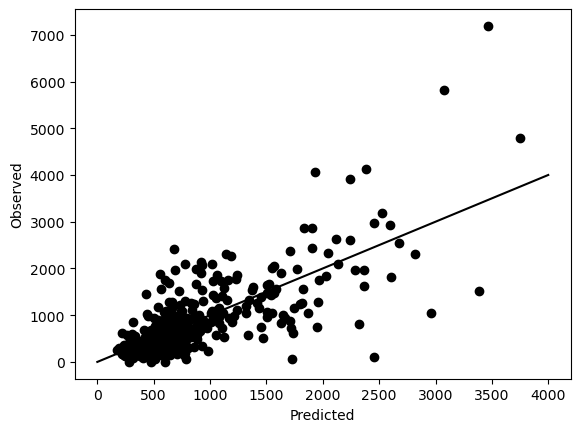

test data correlation coefficient is: 0.7537855150607357
train data correlation coefficient is: 0.9087745684184629


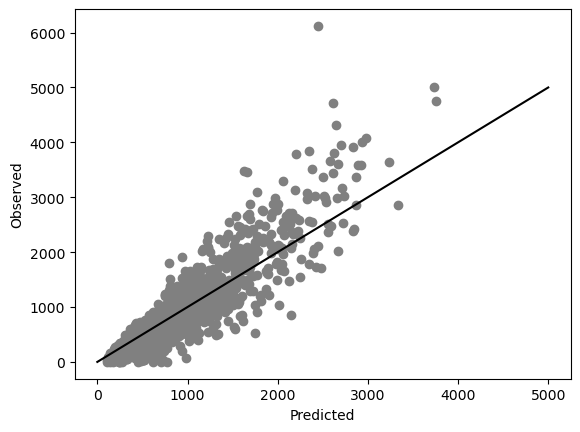

In [10]:
plt.scatter(y_pred, yargs_test, color = 'black') ##label axes - x,y in order?
# plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 4000], [0, 4000], 'k-')
plt.show()

print('test data correlation coefficient is: ' + str(np.corrcoef(yargs_test, y_pred)[0, 1]))

train_pred = pipe.predict(xargs_train) ##Not sure if this is the right thing to do here
plt.scatter(train_pred, yargs_train, color = 'gray')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 5000], [0, 5000], 'k-')
plt.show

print('train data correlation coefficient is: ' + str(np.corrcoef(train_pred, yargs_train)[0, 1]))

In [11]:
##k-fold cross validation; random forest

##ORIGINAL PREDICTORS:
# predictors = df1[
#     [
#         'ndvi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b','wdrvi5', 'savi', 'Elevation', 'tmax', 'tmin', 'DOY', 'ndvi_augoct',
#         'savi_augoct','wdrvi5_augoct','nd_r_g_augoct','nd_g_b_augoct','nd_swir2_nir_augoct', 'nd_swir2_r_augoct',
#         'ndvi_sepoct','savi_sepoct','wdrvi5_sepoct','nd_r_g_sepoct','nd_g_b_sepoct', 'nd_swir2_nir_sepoct', 
#         'nd_swir2_r_sepoct','ndvi_octnov','savi_octnov','wdrvi5_octnov','nd_r_g_octnov','nd_g_b_octnov',
#         'nd_swir2_nir_octnov', 'nd_swir2_r_octnov','ndvi_yr','savi_yr','wdrvi5_yr','nd_r_g_yr','nd_g_b_yr',
#         'nd_swir2_nir_yr', 'nd_swir2_r_yr'
#     ]
# ]

# targets = df1['Plant_Biomass'] 

#Predictors below are based on feature selection - most important variables

predictors = xargs

targets = df1['Plant_Biomass'] 

from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold, cross_validate
# from sklearn.datasets import load_boston

X, y = predictors, targets
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True)

model = pipe
scoring=('r2', 'neg_root_mean_squared_error')

cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)
cv_results

##from: https://stackoverflow.com/questions/55270431/how-to-correctly-perform-cross-validation-in-scikit-learn

#Old predictors:
#'Percent_flooding','flats','Elevation', 'nd_swir2_nir_peak','dayl_daymMarMay', 'wdrvi5_peak', 'ndvi_peak', 
#'nd_swir2_nir', 'dayl_Max', 'dayl_Min','tmax_peak',
#'srad_peak', 'savi', 'evi','nd_swir2_nir_year', 'nd_g_b','Green_band_year','SWIR1_band_peak','SWIR2_band_peak',
#'evi_peak','ndvi_prcp_interaction'

{'fit_time': array([18.97984886, 16.18489337, 16.10672235, 16.06472015, 15.92358637,
        15.65264893, 15.44960284, 15.59016466, 15.58295178, 15.76197791]),
 'score_time': array([0.06324029, 0.0624795 , 0.06245184, 0.06248617, 0.0624764 ,
        0.06246519, 0.06247544, 0.06248665, 0.06248569, 0.06248546]),
 'test_r2': array([0.45397813, 0.56114115, 0.52024032, 0.49413036, 0.6376832 ,
        0.65917603, 0.43763195, 0.42977376, 0.54339332, 0.59106778]),
 'test_neg_root_mean_squared_error': array([-572.01408718, -497.21260085, -464.55402131, -458.23698561,
        -447.24415764, -516.33932714, -459.50193828, -623.63061107,
        -518.36205721, -443.93023138])}

In [12]:
#Feature importance and average RMSE
x = pd.DataFrame(cv_results)
print(x['test_r2'].mean())
print(x['test_neg_root_mean_squared_error'].mean())
print('NRMSE is: ' + str(x['test_neg_root_mean_squared_error'].mean()/np.ptp(yargs_test)))

0.532821599004859
-500.1026017670125
NRSME is: -0.06956079447820253


In [12]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# X = xargs_train.copy().dropna()
# vif_data = pd.DataFrame()
# vif_data["Feature"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# print(vif_data)

In [13]:
##Feature selection
import time
import numpy as np

feature_importances = pipe.named_steps['forest'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': xargs.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(20))  # Keep the top 20 most important features

# pd.set_option('display.max_rows', None)
# print(feature_importance_df)

              Feature  Importance
0           Elevation    0.192949
1   nd_swir2_nir_peak    0.144688
2        nd_swir2_nir    0.104039
6           srad_peak    0.063311
3    Percent_flooding    0.057905
13      nd_g_b_MarMay    0.040637
8               flats    0.038018
7       NIR_band_year    0.036091
4            dayl_Max    0.033088
19          Blue_band    0.031921
15      Red_band_year    0.029873
17    SWIR1_band_year    0.029099
14               savi    0.029059
10          ndvi_peak    0.027089
18             nd_g_b    0.025453
16  nd_swir2_nir_year    0.024122
12        swe_rolling    0.023707
5            dayl_Min    0.023653
9         wdrvi5_peak    0.023175
11    dayl_daymMarMay    0.022123


In [14]:
print(len(yargs))

##More work to do

2036


<AxesSubplot:xlabel='Percent_flooding', ylabel='Plant_Biomass'>

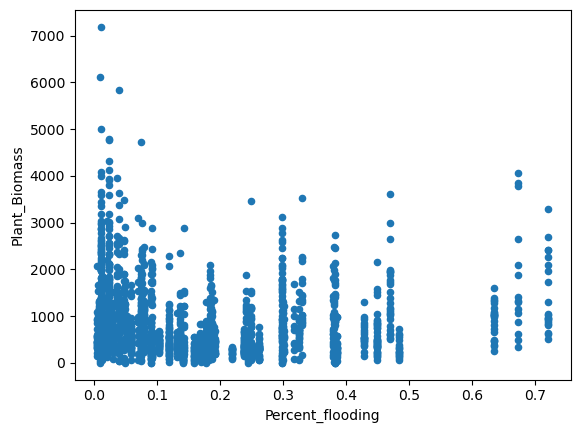

In [15]:
g = df1.plot(kind = 'scatter', x = 'Percent_flooding', y = 'Plant_Biomass')

g

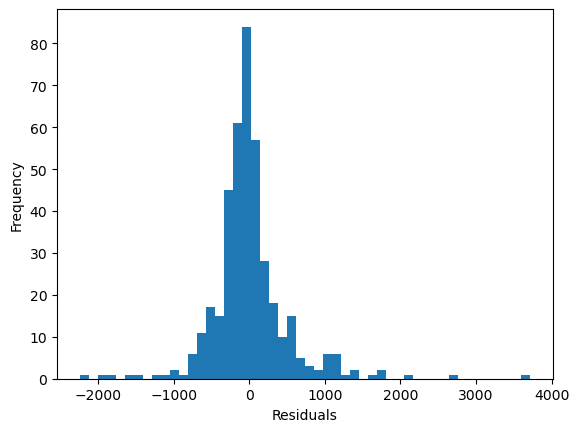

In [16]:
import matplotlib.pyplot as plt
residuals = yargs_test - y_pred
plt.hist(residuals, bins=50)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# plt.scatter(yargs_test, y_pred)
# plt.xlabel("Actual Biomass")
# plt.ylabel("Predicted Biomass")
# plt.plot([min(yargs_test), max(yargs_test)], [min(yargs_test), max(yargs_test)], 'r--')
# plt.show()

In [17]:
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {
#     'forest__n_estimators': [50, 100, 200, 300, 500, 1000],
#     'forest__max_depth': [10, 20, 30, None],
#     'forest__min_samples_split': [2, 5, 10],
#     'forest__min_samples_leaf': [1, 2, 4]
# }

# rf_search = RandomizedSearchCV(pipe, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, random_state=seed)
# rf_search.fit(xargs_train, yargs_train)

# print("Best Params:", rf_search.best_params_)
# pipe = rf_search.best_estimator_

In [18]:
'''
TESTING ON VIRGINIA DATA BELOW. CONTINUE CAREFULLY
'''

'\nTESTING ON VIRGINIA DATA BELOW. CONTINUE CAREFULLY\n'

In [19]:
#Testing on VA data
import os

va1 = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/va_testzzz.csv')
# va1 = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/va_testx.csv')

path = r'C:/Users/arj26323/Documents/Xin data/Virginia' 
all_files = glob.glob(path + "/*.csv")

# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df)

# va = pd.concat(li, axis=0, ignore_index=True)


# va_flooding = va.groupby(['Latitude', 'Longitude', 'Year']).apply(
#     lambda g: (g['flats'] >= 0.2).mean()).reset_index(name='Percent_flooding'
#                                                      )

va1.rename(columns={'elevation':'Elevation'}, inplace=True)
va1 = va1[va1['prcp'].notna()] ##CAREFUL; added 7/11/22

#Adding evi
va1['evi'] = ((va1['NIR_band']-va1['Red_band'])*2.5)/(va1['NIR_band']+6*va1['Red_band']+7.5*va1['Blue_band']+1)
va1['evi_peak'] = ((va1['NIR_band_peak']-va1['Red_band_peak'])*2.5)/(va1['NIR_band_peak']+6*va1['Red_band_peak']+\
                                                                     7.5*va1['Blue_band_peak']+1)
# va1['evi_MarMay'] = ((va1['NIR_band_MarMay']-va1['Red_band_MarMay'])*2.5)/(va1['NIR_band_MarMay']+6*va1['Red_band_MarMay']+\
#                                                                            7.5*va1['Blue_band_MarMay']+1)
va1['evi_year'] = ((va1['NIR_band_year']-va1['Red_band_year'])*2.5)/(va1['NIR_band_year']+6*va1['Red_band_year']+\
                                                                     7.5*va1['Blue_band_year']+1)


# va1 = va1.merge(va_flooding, on=['Latitude', 'Longitude', 'Year'], how='inner')

va1['Plant_Biomass'] = va1['liveMass']
va1['Plant_Biomass']

0      278.613333
1      367.160000
2      138.354286
3       21.200000
4       88.400000
          ...    
487     43.440000
488    168.480000
489    158.240000
490    127.520000
491    191.280000
Name: Plant_Biomass, Length: 492, dtype: float64

In [20]:
va_predictors = va1[
    [
        'Elevation', 
        'nd_swir2_nir_peak',
        'nd_swir2_nir', 
#         'Percent_flooding',
        'dayl_Max', 
        'dayl_Min',
        'srad_peak', 
        'NIR_band_year',
        'flats',
        'wdrvi5_peak', 
        'ndvi_peak', 
#         'dayl_daymMarMay', 
        'swe_rolling',
#         'nd_g_b_MarMay',
        'savi', 
        'Red_band_year',
        'nd_swir2_nir_year', 
        'SWIR1_band_year',
        'nd_g_b',
        'Blue_band'
    ]
]

va_targets = va1['Plant_Biomass'] 

X, y = va_predictors, va_targets
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True)

model = pipe
scoring=('r2', 'neg_root_mean_squared_error')

cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)
cv_results

{'fit_time': array([0.72685289, 0.7131319 , 0.69325209, 0.70056677, 0.70203471,
        0.73458052, 0.72600293, 0.76181388, 0.75275159, 0.73743677]),
 'score_time': array([0.01019359, 0.01083541, 0.00899744, 0.01012921, 0.01664257,
        0.01799536, 0.01198936, 0.01336884, 0.01097059, 0.01798773]),
 'test_r2': array([ 2.23700721e-01,  1.70100987e-01,  1.91547120e-02,  3.36216088e-01,
         3.57728968e-01,  4.11293198e-01, -1.90837265e-04,  2.25910088e-01,
         1.61589777e-01,  3.40354670e-01]),
 'test_neg_root_mean_squared_error': array([-243.02936588, -326.01608017, -170.72947888, -238.18378987,
        -225.59655595, -177.90995674, -262.00701406, -292.46208208,
        -237.24796151, -267.17675362])}

In [21]:
va_pred = pipe.predict(va_predictors)

plt.scatter(va_pred, va_targets, color = 'black') ##label axes - x,y in order?
# plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 4000], [0, 4000], 'k-')
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Percent_flooding
- dayl_daymMarMay
- nd_g_b_MarMay


In [ ]:
va1['Region'] = 'VCR'
df1['Region'] = 'GCE'

ulti = pd.concat([df1, va1])
ulti

In [26]:
##CAREFUL OF VARIABLE REDUNDANCY
xargs=ulti[
    [
        'Elevation', 
        'nd_swir2_nir_peak',
        'nd_swir2_nir', 
#         'Percent_flooding',
        'dayl_Max', 
        'dayl_Min',
        'srad_peak', 
        'NIR_band_year',
        'flats',
        'wdrvi5_peak', 
        'ndvi_peak', 
#         'dayl_daymMarMay', 
        'swe_rolling',
#         'nd_g_b_MarMay',
        'savi', 
        'Red_band_year',
        'nd_swir2_nir_year', 
        'SWIR1_band_year',
        'nd_g_b',
        'Blue_band'
    ]
]

yargs=ulti['Plant_Biomass'] 

size_x = 0.2
seed = 3
xargs_train, xargs_test, yargs_train, yargs_test = train_test_split(xargs, yargs, test_size=size_x, random_state = seed) 
## 80% training and 20% test

pipe2 = Pipeline([('scaler', StandardScaler()), ('forest', RandomForestRegressor(n_estimators=200, 
                                                                                min_samples_split=10, 
                                                                                min_samples_leaf=2,
                                                                                max_depth=30, random_state=seed))])
pipe2.fit(xargs_train, yargs_train)
y_pred=pipe2.predict(xargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yargs_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred)))
r_square = metrics.r2_score(yargs_test, y_pred)
print("The r squared is: " + str(r_square))
print(r_square)
print('testing r2 is: ' + str(pipe2.score(xargs_test, yargs_test)))
print('training r2 is: ' + str(pipe2.score(xargs_train, yargs_train)))
print('NRMSE is: ' + str(np.sqrt(metrics.mean_squared_error(yargs_test, y_pred))/np.ptp(yargs_test)))

# Mean
print('MEAN BASELINE:')
y_pred_mean = [np.mean(yargs_train)] * len(yargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred_mean))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred_mean)))

# NDVI
print('NDVI BASELINE: unfinished')


Mean Absolute Error: 306.4914566909568
Mean Squared Error: 217722.71488380956
Root Mean Squared Error: 466.60766697924026
The r squared is: 0.5610465859818438
0.5610465859818438
testing r2 is: 0.5610465859818438
training r2 is: 0.8063675156246124
NRMSE is: 0.08006715285801068
MEAN BASELINE:
Mean Absolute Error: 488.7333985523691
Root Mean Squared Error: 704.2849097304838
NDVI BASELINE: unfinished


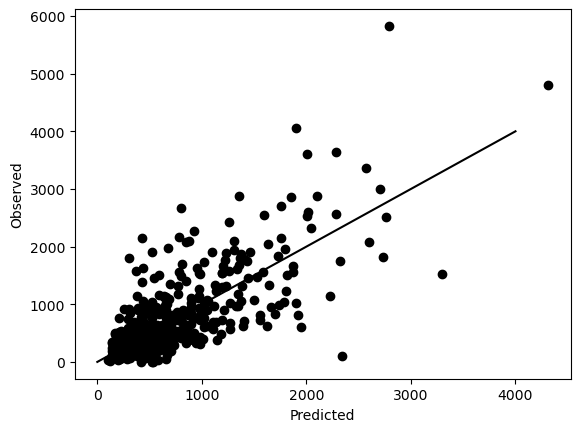

test data correlation coefficient is: 0.7494422721004647
train data correlation coefficient is: 0.9042699246833066


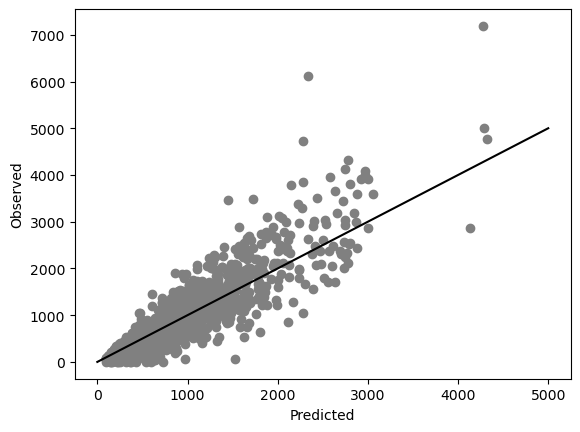

In [27]:
plt.scatter(y_pred, yargs_test, color = 'black') ##label axes - x,y in order?
# plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 4000], [0, 4000], 'k-')
plt.show()

print('test data correlation coefficient is: ' + str(np.corrcoef(yargs_test, y_pred)[0, 1]))

train_pred = pipe2.predict(xargs_train)
plt.scatter(train_pred, yargs_train, color = 'gray')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 5000], [0, 5000], 'k-')
plt.show

print('train data correlation coefficient is: ' + str(np.corrcoef(train_pred, yargs_train)[0, 1]))

In [29]:
predictors = xargs

targets = ulti['Plant_Biomass'] 

X, y = predictors, targets
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True)

model = pipe2
scoring=('r2', 'neg_root_mean_squared_error')

cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)

x = pd.DataFrame(cv_results)
print(x['test_r2'].mean())
print(x['test_neg_root_mean_squared_error'].mean())
print('NRSME is: ' + str(x['test_neg_root_mean_squared_error'].mean()/np.ptp(yargs_test)))


0.5600788054317811
-462.3794312020558
NRSME is: -0.07934161227166922


In [28]:
#Fin